In [21]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

csv_dir="C:\Datasets\labels_and_features_VAL_and_TRAIN.csv" 
npy_dir=r"C:\Datasets\Engagement\npy"
mask_dir=r"C:\Datasets\Engagement\teachernpy"
unmask_dir=r"C:\Datasets\Engagement\studentnpy"
df = pd.read_csv(csv_dir)

# Iterate through each row
for index, row in tqdm(df.iterrows()):
    nose_x = int(row['noseX'])
    nose_y = int(row['noseY'])

    right_kneeX	=int(row['right_kneeX'])
    right_kneeY=int(row['right_kneeY'])
    right_elbowX	=int(row['right_elbowX'])
    right_elbowY=int(row['right_elbowY'])

    img_id = row['imgID']

    # Get the basename without extension
    basename = os.path.splitext(img_id)[0]

    # Load the .npy file
    npy_path = os.path.join(npy_dir, f"{basename}.npy")
    if os.path.exists(npy_path):
        array = np.load(npy_path)

        # Check the value at the specified position
        if array[nose_y][nose_x] != 0:
            yyy,xxx=nose_y,nose_x
        elif array[right_kneeY][right_kneeX] != 0:
            yyy,xxx=right_kneeY,right_kneeX
            
        elif array[right_elbowY][right_elbowX] != 0:
            yyy,xxx=right_elbowY,right_elbowX    
        else:
            print("Detect failure")
            yyy,xxx=555,555
        value = array[yyy][xxx]
        # Create mask with the same value
        mask = np.zeros_like(array)
        mask[array == value] = 1

        # Create unmask with all other values masked
        unmask = np.zeros_like(array)
        unmask[(array != value) & (array != 0)] = 1

        # Save masks
        np.save(os.path.join(mask_dir, f"{basename}.npy"), mask)
        np.save(os.path.join(unmask_dir, f"{basename}.npy"), unmask)





Detect failure


Size of (720, 1280)


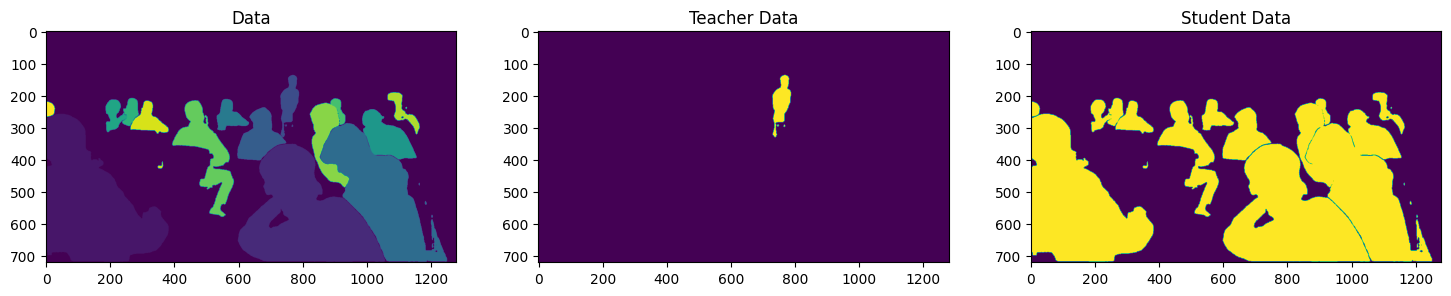

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Example usage:
filepath=r"C:\Datasets\Engagement\npy\001644.npy"
data = np.load(filepath)
tdata = np.load(r"C:\Datasets\Engagement\teachernpy\001644.npy")
sdata = np.load(r"C:\Datasets\Engagement\studentnpy\001644.npy")
print(f"Size of {data.shape}")

# Plot the data
plt.figure(figsize=(18, 6))

# Plot data
plt.subplot(1, 3, 1)
plt.imshow(data)
plt.title('Data')

# Plot tdata
plt.subplot(1, 3, 2)
plt.imshow(tdata)
plt.title('Teacher Data')

# Plot sdata
plt.subplot(1, 3, 3)
plt.imshow(sdata)
plt.title('Student Data')

plt.show()
